In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df=pd.read_csv("diabetes_risk.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [137]:
#checking for the null values is done 
df.isnull().sum()
# Numerical attributes:

# when the number of the missing value is low we can study the central tendecy of the data if:
# if the standrded deviation is low(which means that the variablity of between the data is normal
# we find the mean and assign it to the missing value otherwise we find the mode which is not affected by
# deviation(it is not affected by the outlier).

# when we have high number of missing values and the column or the row is not essential we might be droping

# Categorical attributes:
# At the level of categorical data we can use the value of mode which is the most frequent value
# when having a significant number of missing values we might drop the data.

#so we are going to use a function that fills the missing data automatically
    

#if we have alot of missing data at many columns(attributs) or rows(instances) and we go with doping the the data this will lead to losing the data


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [138]:
#in this code we are Randomizing the Data
#what we are mainly doing is that we are shuffling the dataset to ensure that the data is randomized before spliting into the training
#and the testing sets

# Load the dataset
df = pd.read_csv("diabetes_risk.csv")

# View the first 5 rows before shuffling (display automatically in Jupyter or similar environments)
print("Before shuffling:")
display(df.head())

# Shuffle the DataFrame
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# View the first 5 rows after shuffling
print("\nAfter shuffling:")
display(shuffled_df.head())

Before shuffling:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive



After shuffling:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
1,40,Female,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,Positive
2,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
3,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Positive
4,45,Female,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Positive


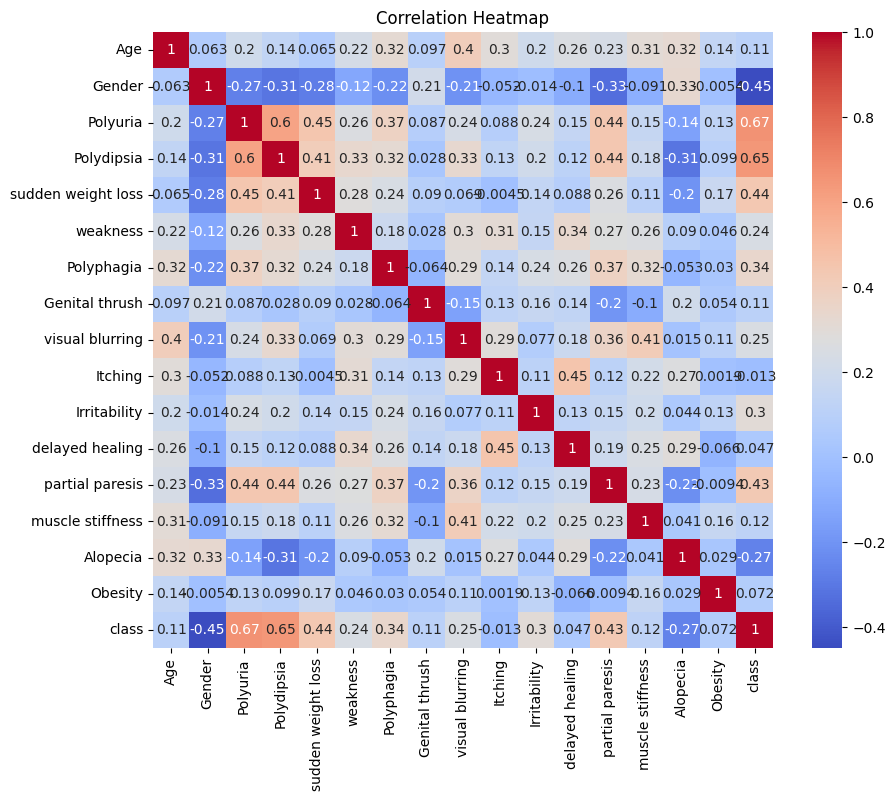

In [139]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Encode categorical variables (if needed)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# as we can viualize in the heatmap below which displayes the correlation between the attributes 
# it is obvious that the higher correlation is 0.67 between the polyuria and the class which is the target 
# and this seams that polyuria is important feature for class detection.


# the other correlation are realtively low which indicates we have no redundant data


# In general when applying Trees Based Models we are selecting the features based on the split (we choose the attribute that highly
# contributes in the decision and reduced impurity) and not on the correlation between the attributes 

# in conclusion we dont need to drop any of the attributes ===> no merging of the attributes

In [140]:

# Count occurrences of each row
duplicates_count = df[df.duplicated(keep=False)]  # Select all rows that are duplicates
duplicates_summary = duplicates_count.value_counts().reset_index(name='Count')

# Display duplicates with their counts
if not duplicates_summary.empty:
    print("Duplicate rows and their counts:")
    display(duplicates_summary)
else:
    print("No duplicate rows found.")

# here required the duplicates removal

Duplicate rows and their counts:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Count
0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
1,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,7
2,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
3,53,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,7
4,39,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,68,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1,2
103,70,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1,2
104,72,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,2
105,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,2


In [141]:
# this code is deleting the duplicates 

# Print the number of rows before removing duplicates
print(f"Number of rows before removing duplicates: {df.shape[0]}")

# Remove duplicate rows, keeping only the first occurrence
df_cleaned = df.drop_duplicates(keep='first').copy()

# Print the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

# Display the cleaned dataset
df_cleaned.head()


Number of rows before removing duplicates: 520
Number of rows after removing duplicates: 251


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


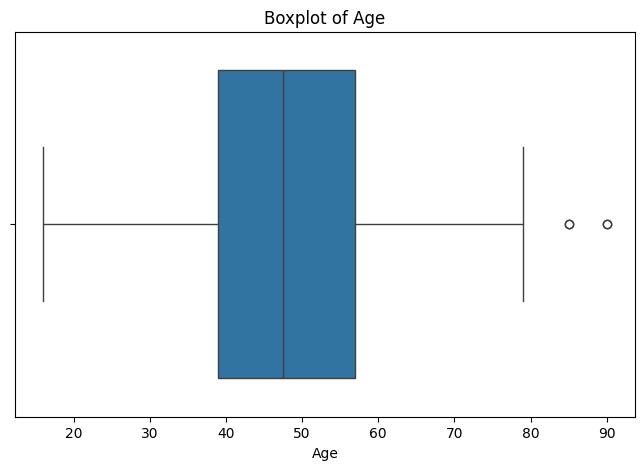

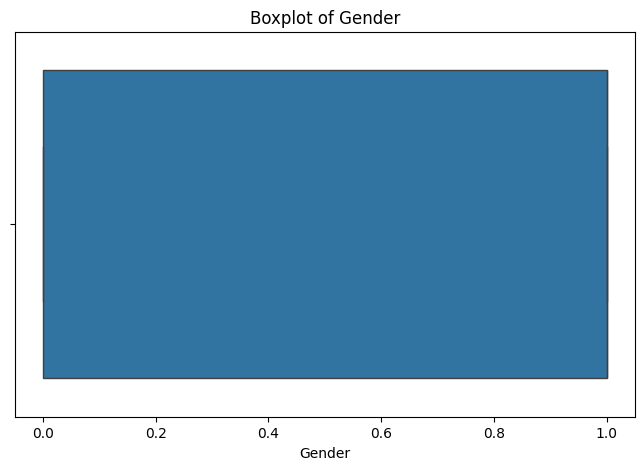

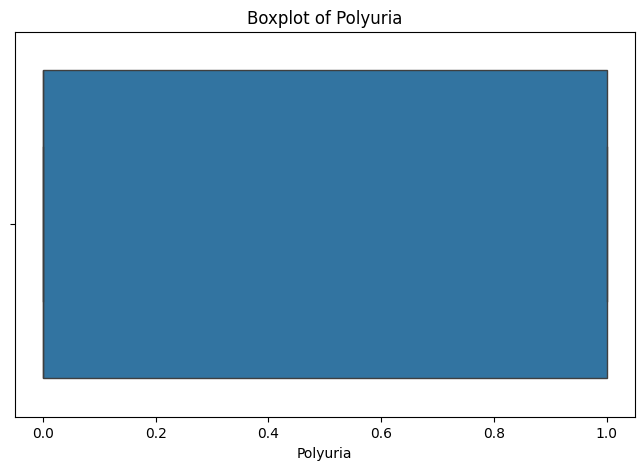

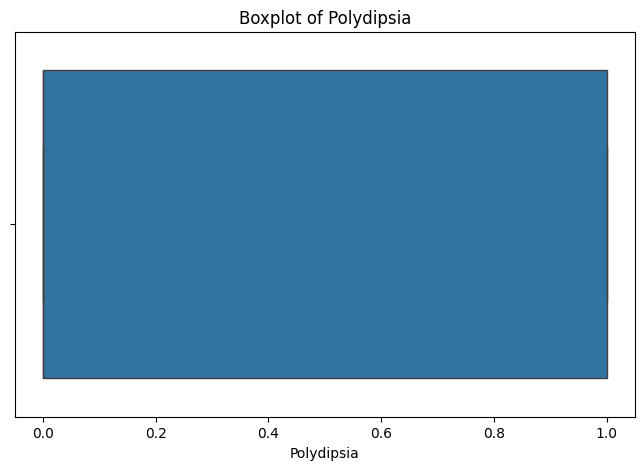

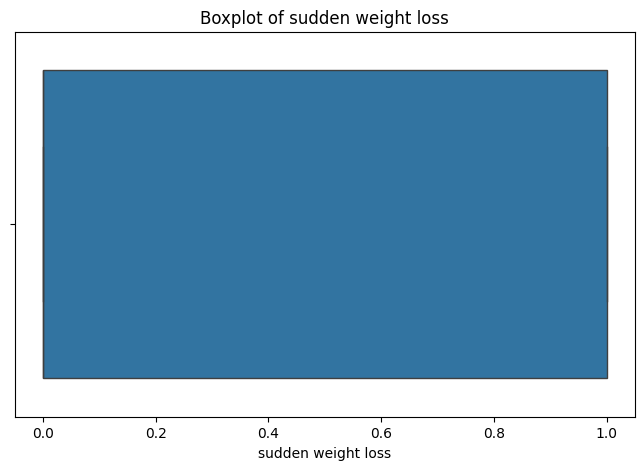

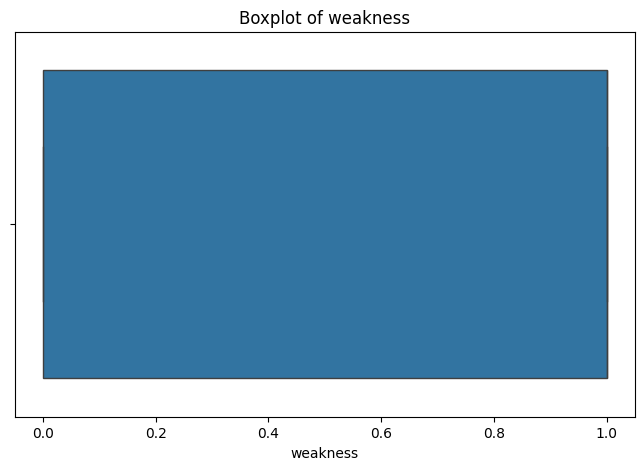

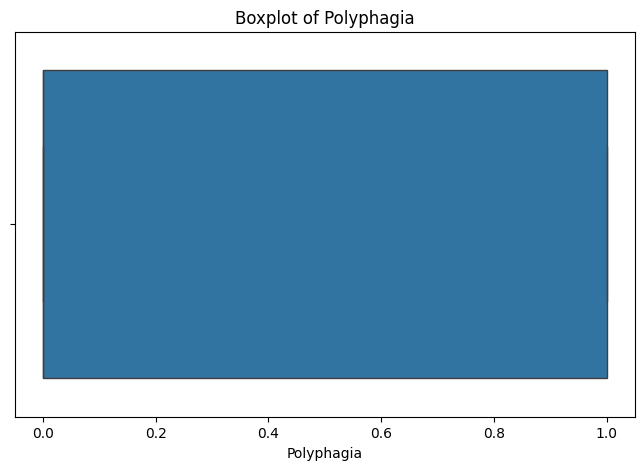

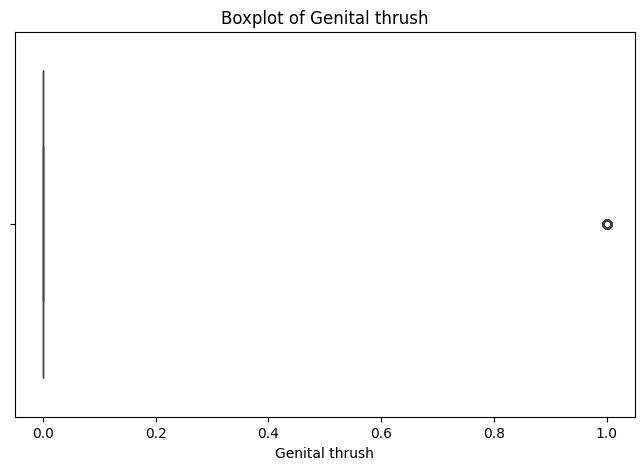

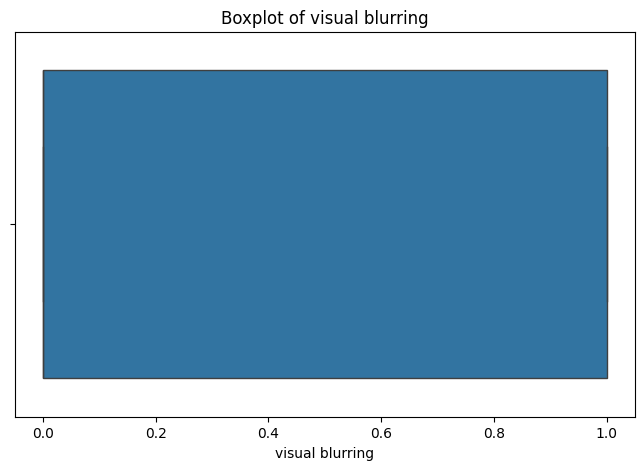

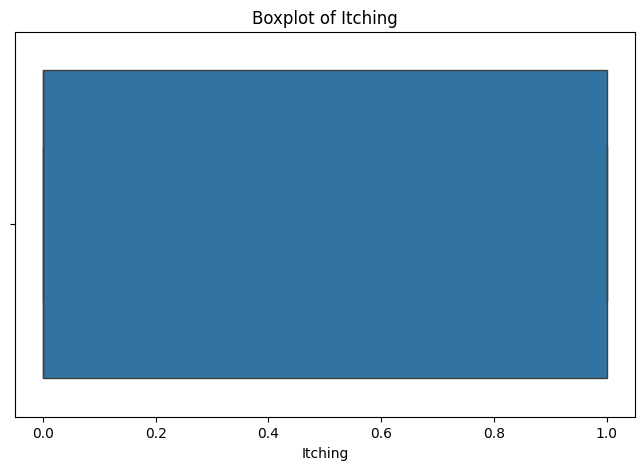

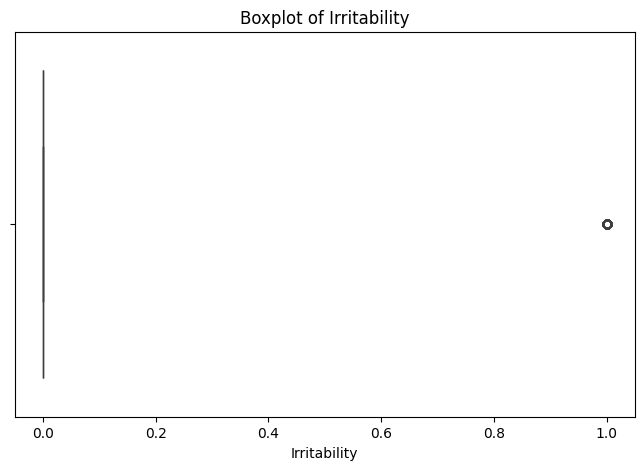

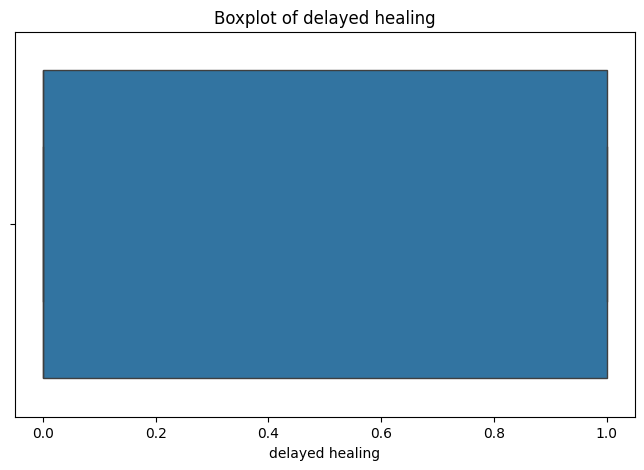

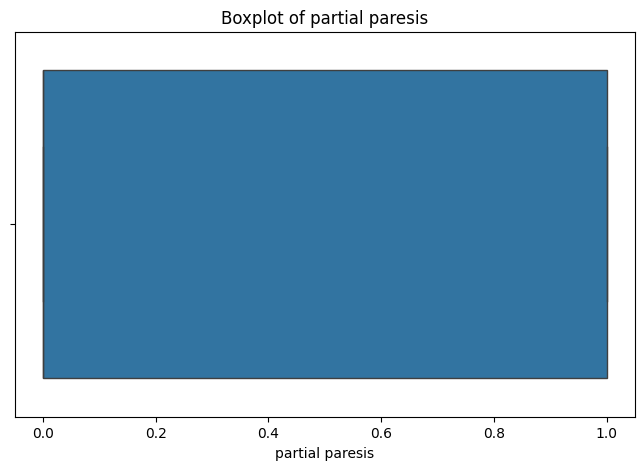

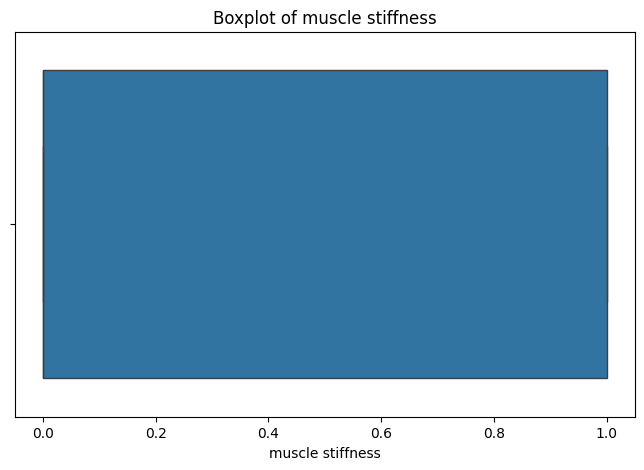

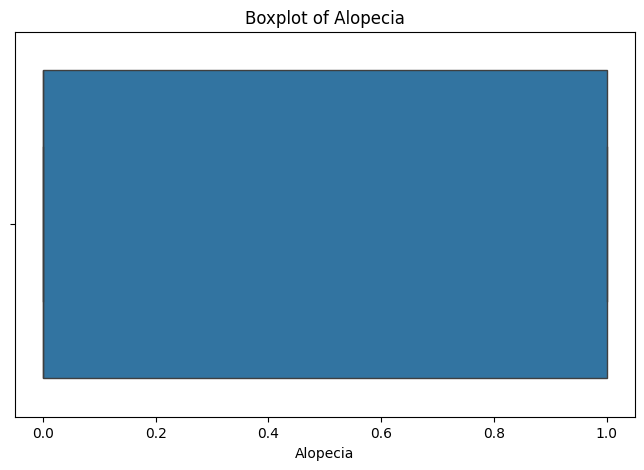

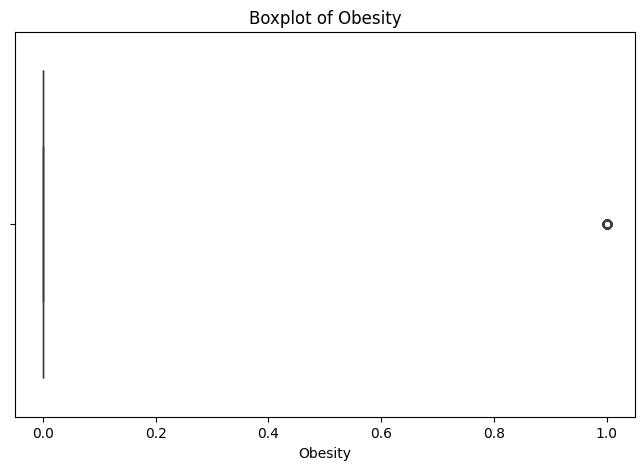

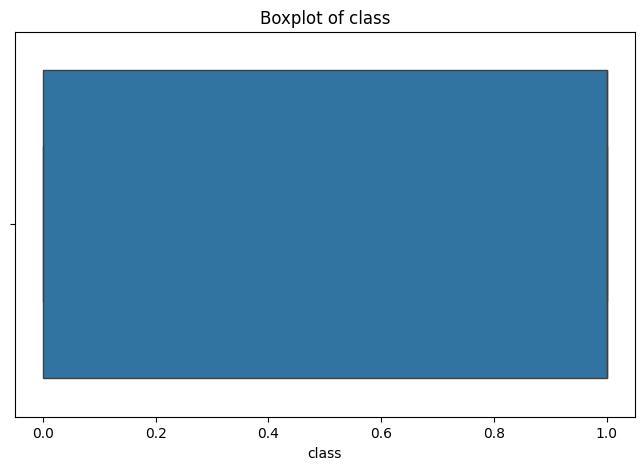

In [142]:
#Out liers Detection 
# Create boxplots for each numeric column
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns  # Select only numeric columns

# Loop through each numeric column and create a boxplot
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

#here requires the removing of the outlier 

Lower Bound for Age: 10.5, Upper Bound for Age: 86.5
Summary statistics for Age after handling outliers:
count    251.000000
mean      48.850598
std       12.481931
min       16.000000
25%       39.000000
50%       48.000000
75%       58.000000
max       86.500000
Name: Age, dtype: float64


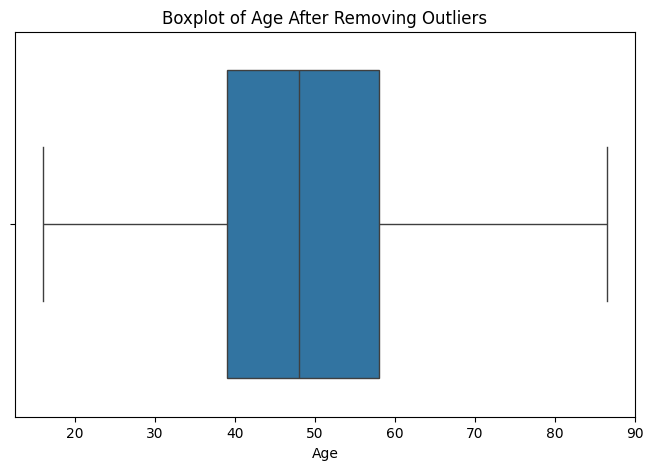

In [143]:
# here after we have discovered the outliears, we should preserve the data set because the size of the data
#set does not help in removing the whole row, we try to estimate better values using the regression(which finding the attribute that is highly correlated with the attribut of the outliear then we build the 
#logistic regression to predict the best value of the attribute, and logistic regression is usually used in the binary classification) and clipping where clipping is choosing the value which 
# replacing the values below the lower bound withe the lower bound and above the upper bound with the upperbound

# in our dataset we have outliers in the age attribute and since age is numeric and we can work in ranges it is better to work with the 
#clipping.
# Detect outliers and clip the values for Age

Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Age: {lower_bound}, Upper Bound for Age: {upper_bound}")

# Clip Age values to handle outliers
df_cleaned['Age'] = df_cleaned['Age'].clip(lower=lower_bound, upper=upper_bound)

# Verify the changes
print("Summary statistics for Age after handling outliers:")
print(df_cleaned['Age'].describe())

# Plot the updated boxplot for Age
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Age'])
plt.title("Boxplot of Age After Removing Outliers")
plt.show()


Fixing outliers for Obesity...
No outliers detected in column 'Obesity'. Skipping...
Fixing outliers for Irritability...
No outliers detected in column 'Irritability'. Skipping...
Fixing outliers for Genital thrush...
No outliers detected in column 'Genital thrush'. Skipping...
Binary outliers handled.
   Obesity  Irritability  Genital thrush
0        1             0               0
1        0             0               0
2        0             0               0
3        0             0               1
4        1             1               0


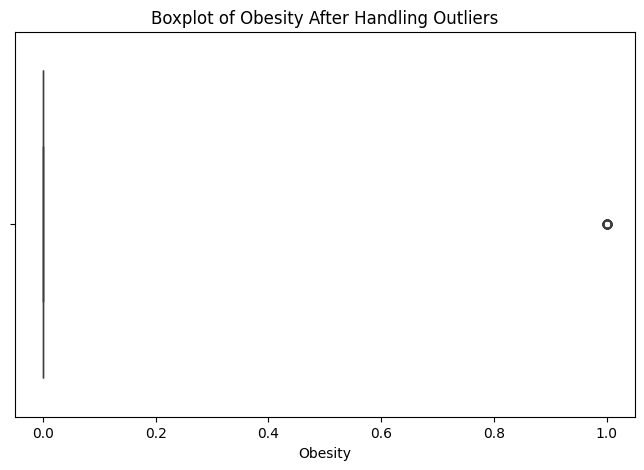

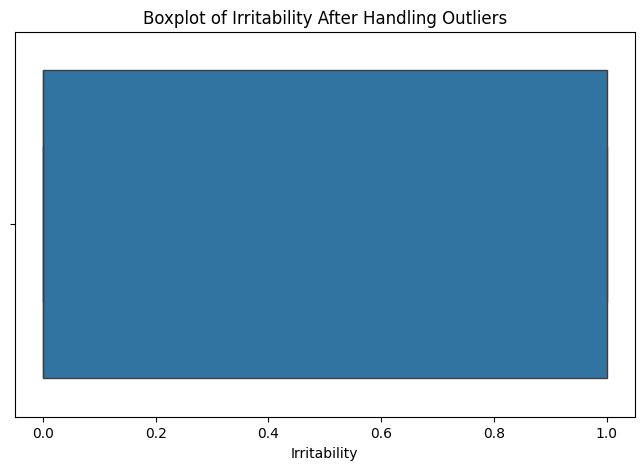

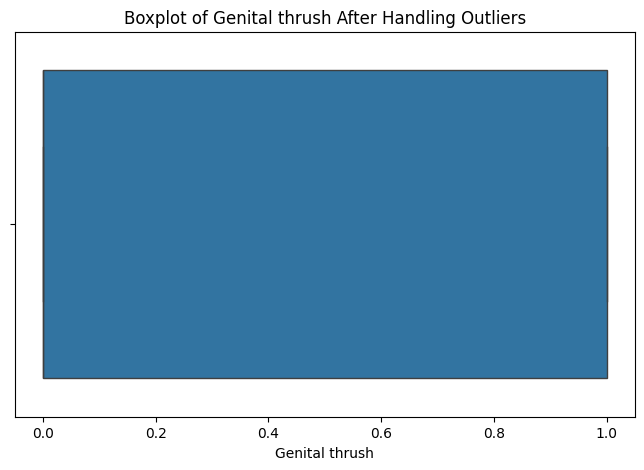

In [144]:
# for the binary columns (Obesity, Irritabbility and Genital thrush)
# we will use the logistic regression

from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to detect outliers in binary columns
def detect_outliers_binary(df, column):
    # Outliers for binary columns are values other than 0 or 1
    return (df[column] != 0) & (df[column] != 1)

# Define a function to handle binary outliers using Logistic Regression
def handle_binary_outliers_with_regression(df, target_column):
    # Detect outliers in the target column
    outliers = detect_outliers_binary(df, target_column)

    # Check if there are any outliers
    if outliers.sum() == 0:
        print(f"No outliers detected in column '{target_column}'. Skipping...")
        return

    # Prepare training data (non-outlier rows)
    predictors = df.drop(columns=[target_column])  # Drop target column for predictors
    target = df[target_column]
    predictors_non_outliers = predictors[~outliers]  # Non-outlier predictors
    target_non_outliers = target[~outliers]  # Non-outlier target values

    # Train logistic regression on non-outlier data
    log_reg = LogisticRegression()
    log_reg.fit(predictors_non_outliers, target_non_outliers)

    # Predict values for outliers
    predictors_outliers = predictors[outliers]  # Outlier predictors
    if predictors_outliers.empty:
        print(f"No valid predictors for outliers in column '{target_column}'. Skipping...")
        return

    predicted_values = log_reg.predict(predictors_outliers)

    # Replace outlier values with predicted values
    df.loc[outliers, target_column] = predicted_values

# List of binary columns with outliers to fix
binary_columns = ['Obesity', 'Irritability', 'Genital thrush']

# Apply logistic regression-based outlier handling for each binary column in df_cleaned
for column in binary_columns:
    print(f"Fixing outliers for {column}...")
    handle_binary_outliers_with_regression(df_cleaned, column)

# Display the updated dataset
print("Binary outliers handled.")
print(df_cleaned[binary_columns].head())

# Plot the boxplots for each binary column after handling outliers
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot of {column} After Handling Outliers")
    plt.show()


In [145]:
df_cleaned.shape

(251, 17)

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
encoder = LabelEncoder()
for i in df_cleaned.columns[1:]:
    df_cleaned[i]= encoder.fit_transform(df_cleaned[i])

df_cleaned.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [149]:
x= df_cleaned.iloc[:,:-1]
y= df_cleaned['class']

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state= 0)

In [151]:
total_rows = 251
train_percentage = (len(x_train) / total_rows) * 100
test_percentage = (len(x_test) / total_rows) * 100

# Print the number of rows and percentages
print(f"Total Rows: {total_rows}")
print(f"Training Set: {len(x_train)} rows ({train_percentage:.2f}%)")
print(f"Testing Set: {len(x_test)} rows ({test_percentage:.2f}%)")

Total Rows: 251
Training Set: 200 rows (79.68%)
Testing Set: 51 rows (20.32%)


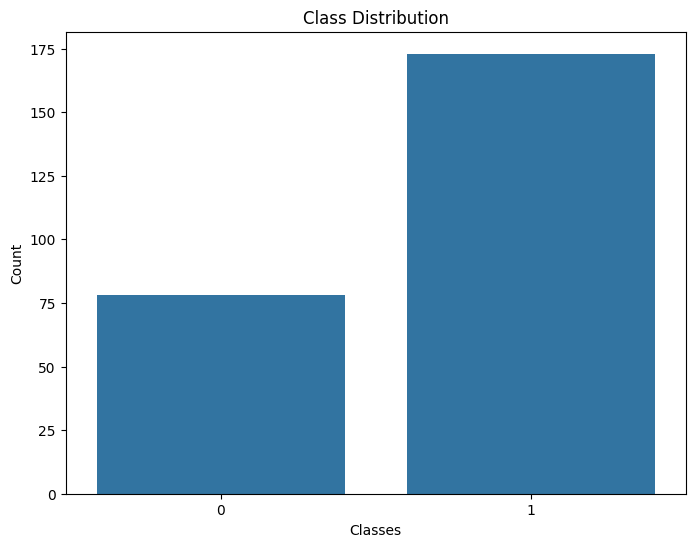

Class Distribution:
 class
1    173
0     78
Name: count, dtype: int64


In [152]:

# Assuming y is your target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

# Display value counts
print("Class Distribution:\n", y.value_counts())


In [153]:
rf = RandomForestClassifier(n_estimators= 10)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [154]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.95      0.95      0.95        38

    accuracy                           0.92        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.92      0.92      0.92        51



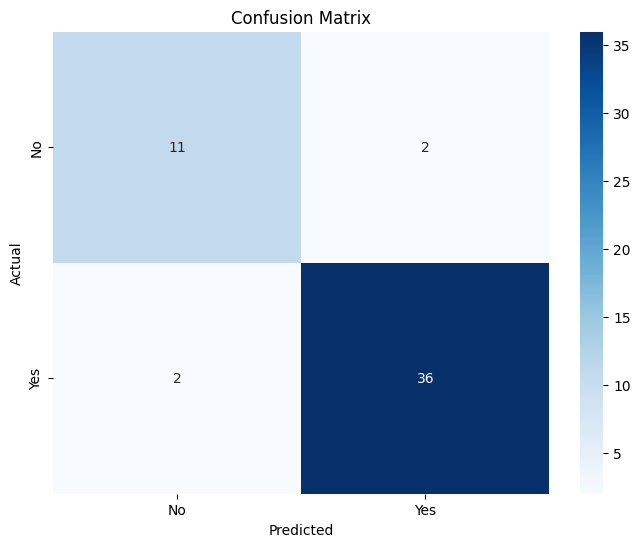

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


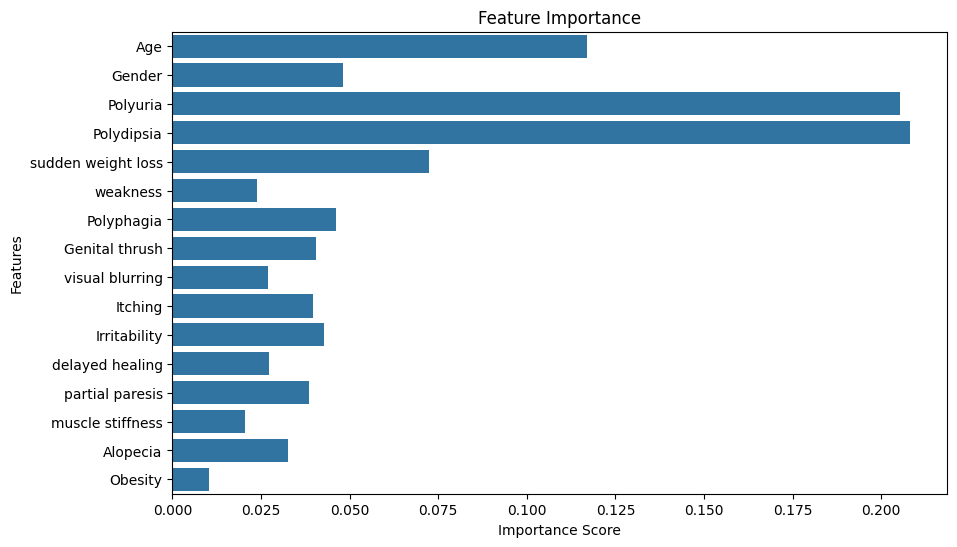

In [156]:
importance = rf.feature_importances_
features = x.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [157]:
from sklearn.metrics import accuracy_score, classification_report

# Print unique values and value counts in the target variable
print("Unique values in the target:", y_train.unique())
print(y_train.value_counts())

# Training phase
y_train_pred = rf.predict(x_train)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Calculate and print training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Testing phase
print("Predicted classes in test set:", set(y_pred))

# Calculate and print testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Unique values in the target: [1 0]
class
1    135
0     65
Name: count, dtype: int64
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       135

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Training Accuracy: 1.00
Predicted classes in test set: {np.int64(0), np.int64(1)}
Testing Accuracy: 0.92


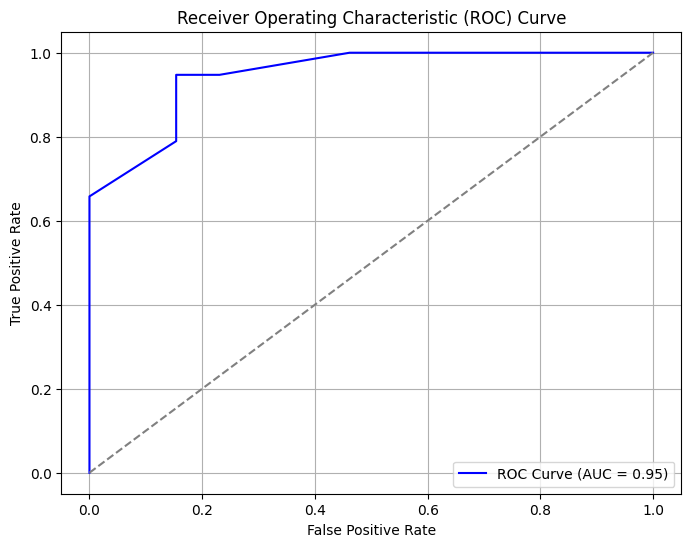

In [158]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_proba are defined
# y_pred_proba should be the probabilities predicted by the model for the positive class

# Get the probabilities for the positive class
y_pred_proba = rf.predict_proba(x_test)[:, 1]  # Assuming 'rf' is your Random Forest model

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)  # Area Under the Curve

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# we can visualize that the area under the Curve is 0.98 which is very close to 1 and which indicates that the model
# is very good in distinguishing between tha classes 

#The curve quickly rises towards the top-left corner (near True Positive Rate (TPR) = 1 and False Positive Rate (FPR) = 0), which signifies strong performance.

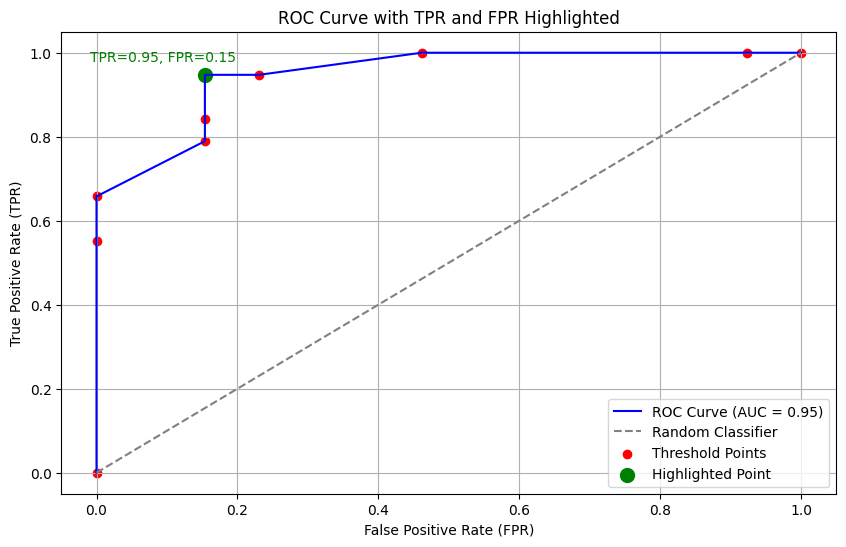

In [159]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_proba are defined
# y_pred_proba should be the probabilities predicted by the model for the positive class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Dashed diagonal line
plt.scatter(fpr, tpr, color='red', label='Threshold Points')  # Highlight TPR and FPR points

# Highlight a specific point on the curve (example: midpoint)
highlight_index = len(fpr) // 2  # Example: Highlighting the middle point
plt.scatter(fpr[highlight_index], tpr[highlight_index], color='green', s=100, label='Highlighted Point')
plt.annotate(
    f'TPR={tpr[highlight_index]:.2f}, FPR={fpr[highlight_index]:.2f}',
    (fpr[highlight_index], tpr[highlight_index]),
    textcoords="offset points",
    xytext=(-30, 10),
    ha='center',
    color='green'
)

# Add axis labels, title, and legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with TPR and FPR Highlighted')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.92      0.89      0.91        38

    accuracy                           0.86        51
   macro avg       0.82      0.83      0.82        51
weighted avg       0.87      0.86      0.86        51

Testing Accuracy: 0.86


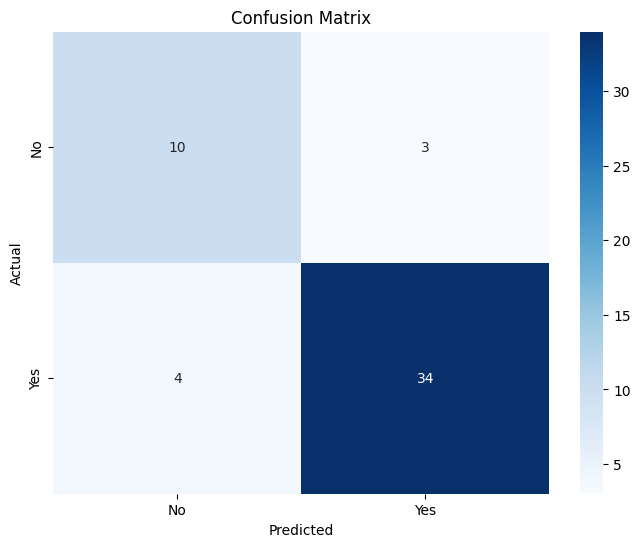

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.88      0.95      0.91        38

    accuracy                           0.86        51
   macro avg       0.84      0.78      0.80        51
weighted avg       0.86      0.86      0.86        51

Testing Accuracy: 0.86


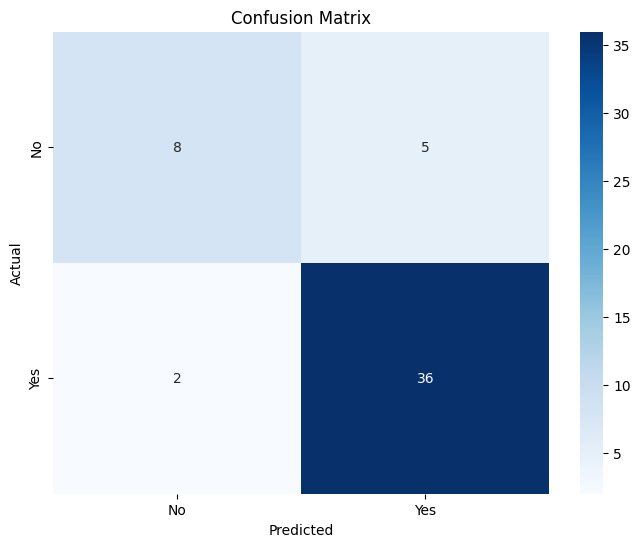

In [161]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.90      0.97      0.94        38

    accuracy                           0.90        51
   macro avg       0.90      0.83      0.86        51
weighted avg       0.90      0.90      0.90        51

Testing Accuracy: 0.90


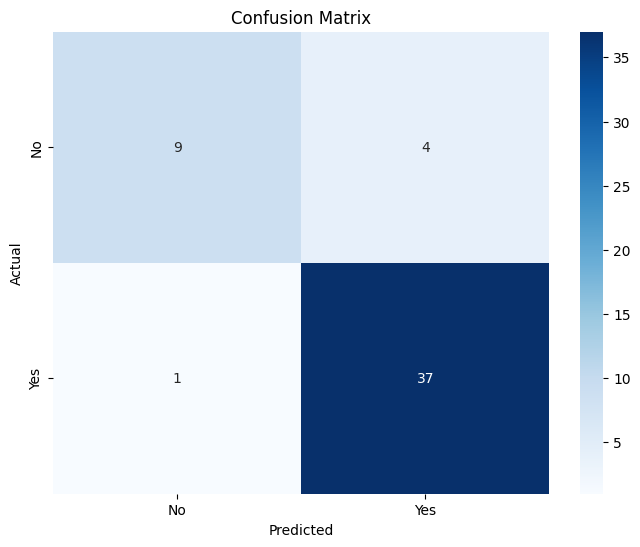

In [162]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# Combine the models into a VotingClassifier (using soft voting)
ensemble_model = VotingClassifier(
    estimators=[
        ('Logistic Regression', logistic_model),
        ('Decision Tree', decision_tree_model),
        ('Random Forest', random_forest_model)
    ],
    voting='soft'  # Use soft voting to average probabilities
)

# Train the ensemble model on the training data
ensemble_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [163]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    train_size=0.8, 
    random_state=0, 
    stratify=y  # Ensures class proportions are maintained
)

# Verify the distribution of classes in each split
print("Original class distribution:")
print(y.value_counts())

print("\nTraining set class distribution:")
print(y_train.value_counts())

print("\nTesting set class distribution:")
print(y_test.value_counts())


Original class distribution:
class
1    173
0     78
Name: count, dtype: int64

Training set class distribution:
class
1    138
0     62
Name: count, dtype: int64

Testing set class distribution:
class
1    35
0    16
Name: count, dtype: int64


In [164]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

print("Class distribution after SMOTE:\n", y_train_balanced.value_counts())


Class distribution after SMOTE:
 class
1    138
0    138
Name: count, dtype: int64


C:\Users\RSS-09\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\RSS-09\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.99        35

    accuracy                           0.98        51
   macro avg       0.99      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51

Testing Accuracy: 0.98


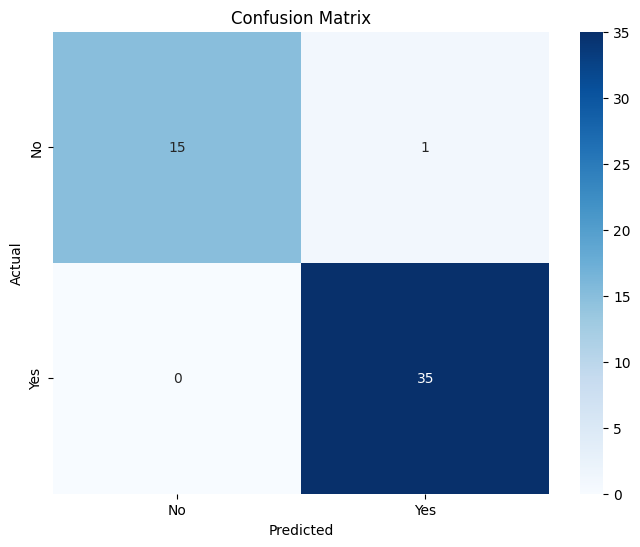

In [165]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.97      0.94      0.96        35

    accuracy                           0.94        51
   macro avg       0.93      0.94      0.93        51
weighted avg       0.94      0.94      0.94        51

Testing Accuracy: 0.94


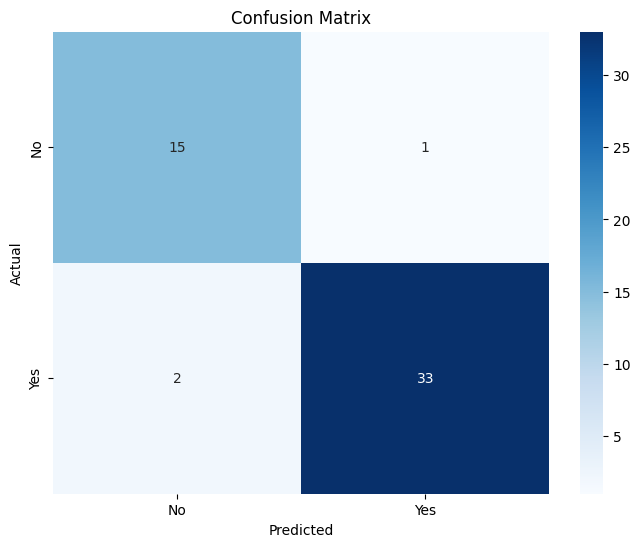

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.92      0.94      0.93        35

    accuracy                           0.90        51
   macro avg       0.89      0.88      0.88        51
weighted avg       0.90      0.90      0.90        51

Testing Accuracy: 0.90


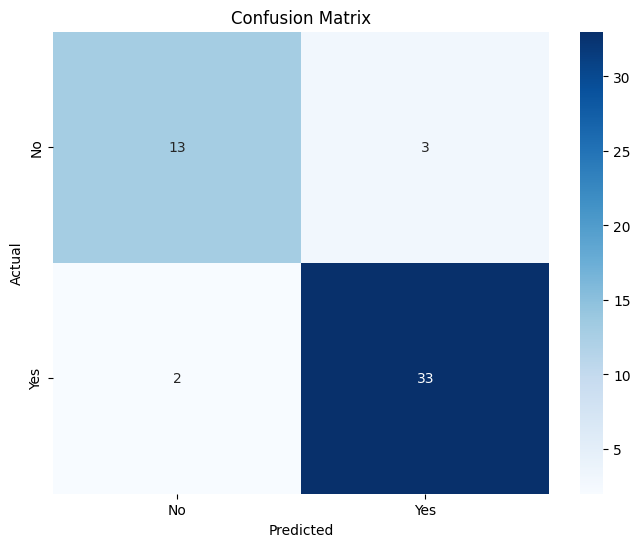

In [167]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


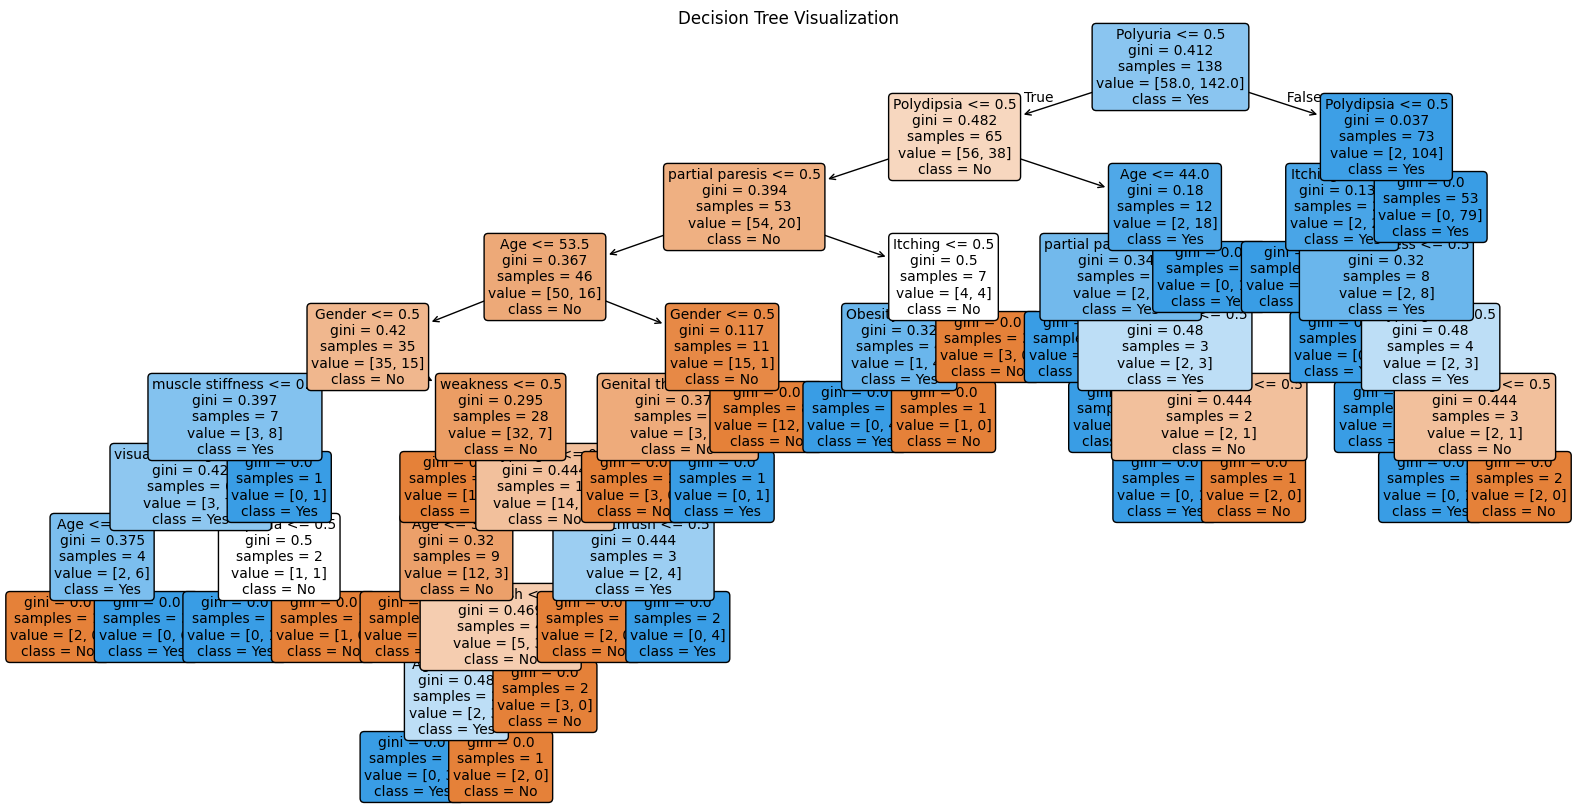

In [168]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'rf' is your Random Forest model
# Extract one of the trees from the Random Forest
single_tree = rf.estimators_[0]  # Random Forest consists of multiple trees; we pick the first one

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree,
    feature_names=x_train.columns,  # Replace with your feature names
    class_names=["No", "Yes"],  # Replace with your class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


In [169]:
import joblib
joblib.dump(rf, "random_forest_model.pkl")
print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'
